In [33]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#get the data
df_raw = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

print(df_raw.head(5))

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [35]:
#look for null values in dataframe
df_raw.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [36]:
#convert categorical variable into numerical
#df_raw['salary']=df_raw['salary'].map({' <=50K':0, ' >50K':1})

In [37]:
df_raw.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [38]:
df_raw['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [39]:
df = df_raw.drop(['education'], axis=1)
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [40]:
#dividing data into independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
#rename columns for convinience
X.columns = ['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country']

In [42]:
#extract categorical and numerical columns
categorical_feature = [feature for feature in X.columns if X[feature].dtypes == 'O']
numerical_feature = [feature for feature in X.columns if X[feature].dtypes != 'O']

numerical_feature

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [43]:
#trim whitespaces from this df
X[categorical_feature] = X[categorical_feature].apply(lambda x: x.str.strip())
X.country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [44]:
#replace '?' with None values to find out null values
X = X.replace({'?': None})
X.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
dtype: int64

In [45]:
#fill null values with median
X.fillna(X.mode().iloc[0], inplace=True)
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
dtype: int64

In [46]:
X.country.unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

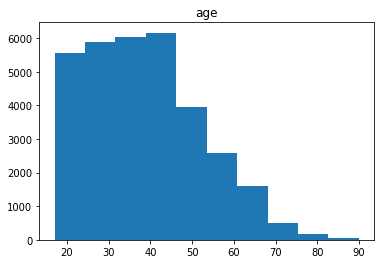

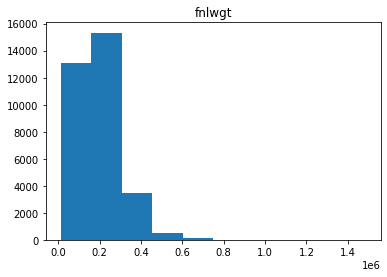

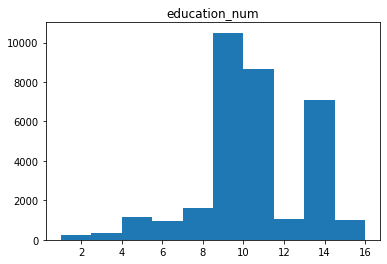

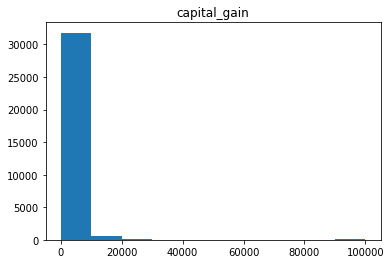

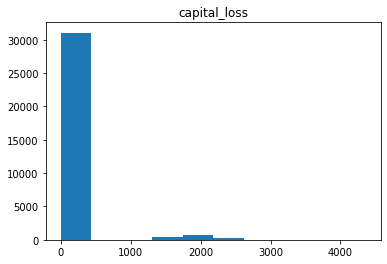

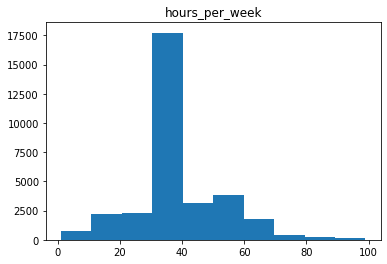

In [47]:
#distribution of num values
for i in X[numerical_feature]:
    plt.hist(X[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

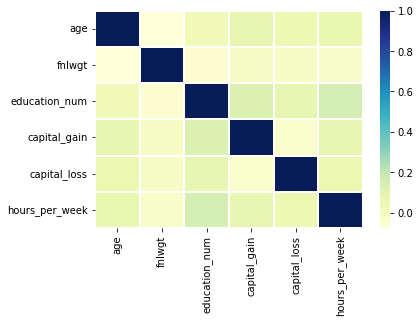

In [48]:
X[numerical_feature].corr()

sns.heatmap(X.corr(), linewidths=0.1, cmap="YlGnBu")

In [49]:
#One hot encoding of categorical variables using get_dummies function
X_cat = pd.concat([pd.get_dummies(X[categorical_feature], drop_first=True), X[numerical_feature]], axis=1)

In [50]:
#Create train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cat,y, random_state=1234, test_size= 0.2)

In [51]:
#Applying Logistic regression alogorithm to train test and find accuaracy of model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.797328420082911

In [52]:
#Check with Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8544449562413634

In [53]:
y_pred = rf.predict(X_test)

In [54]:
# Saving the model
import pickle
pickle.dump(rf, open('salary_clf.pkl', 'wb'))

In [55]:
X_train.to_csv('train.csv')